In [82]:
import pandas as pd
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
import seaborn as sns
import matplotlib.pyplot as plt

In [83]:
telcom = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [84]:
telcom.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [85]:
print ("\nFeatures : \n" ,telcom.columns.tolist())
telcom.dtypes


Features : 
 ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']


customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

Senior Citizen Whether the customer is a senior citizen or not (1, 0)

Partner Whether the customer has a partner or not (Yes, No)

Dependents  Whether the customer has dependents or not (Yes, No)

tenure Number of months the customer has stayed with the company

Phone Service Whether the customer has a phone service or not (Yes, No)

MultipleLines Whether the customer has multiple lines or not (Yes, No, No phone service)

InternetService Customer’s internet service provider (DSL, Fiber optic, No)

OnlineSecurity Whether the customer has online security or not (Yes, No, No internet service)

OnlineBackup Whether the customer has online backup or not (Yes, No, No internet service)

DeviceProtection Whether the customer has device protection or not (Yes, No, No internet service)

TechSupport Whether the customer has tech support or not (Yes, No, No internet service)

StreamingTV Whether the customer has streaming TV or not (Yes, No, No internet service)

StreamingMovies Whether the customer has streaming movies or not (Yes, No, No internet service)

ContractThe contract term of the customer (Month-to-month, One year, Two year)

PaperlessBilling Whether the customer has paperless billing or not (Yes, No)

PaymentMethod The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))

MonthlyCharges The amount charged to the customer monthly

TotalCharges The total amount charged to the customer

In [86]:
# Converting Total Charges to a numerical data type.
telcom.TotalCharges = pd.to_numeric(telcom.TotalCharges, errors='coerce')
telcom.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [87]:
telcom.shape

(7043, 21)

In [88]:
telcom.dropna(inplace = True)
telcom = telcom.reset_index()[telcom.columns]

id= telcom['customerID']
telcom.drop('customerID',axis=1,inplace=True)
#Convertin the predictor variable in a binary numeric variable
telcom['Churn'].replace(to_replace='Yes', value=1, inplace=True)
telcom['Churn'].replace(to_replace='No',  value=0, inplace=True)

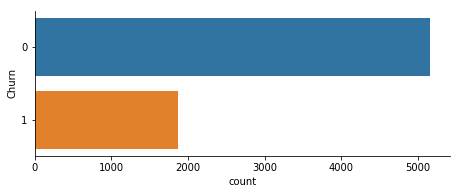

In [89]:
ax = sns.catplot(y="Churn", kind="count", data=telcom, height=2.6, aspect=2.5, orient='h')

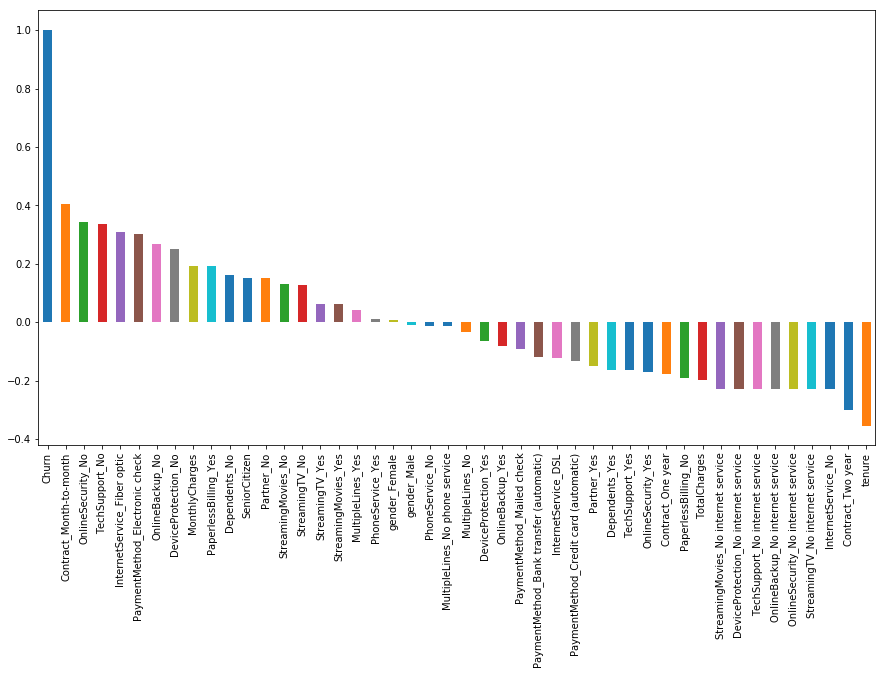

In [90]:
df_dummies = pd.get_dummies(telcom)

plt.figure(figsize=(15,8))
df_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

Month to month contracts, absence of online security and tech support seem to be positively correlated with churn. While, tenure, two year contracts seem to be negatively correlated with churn.

Interestingly, services such as Online security, streaming TV, online backup, tech support, etc. without internet connection seem to be negatively related to churn.

## Gender and Age (SeniorCitizen)

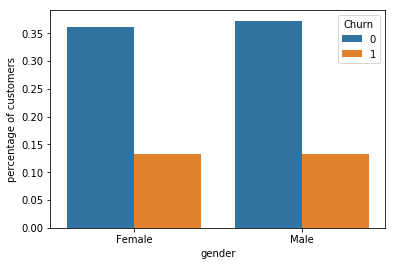

In [91]:
axis_y = "percentage of customers"
gp_sex = telcom.groupby('gender')["Churn"].value_counts()/len(telcom)
gp_sex = gp_sex.to_frame().rename({"Churn": axis_y}, axis=1).reset_index()
sns.barplot(x='gender', y= axis_y, hue='Churn', data=gp_sex)

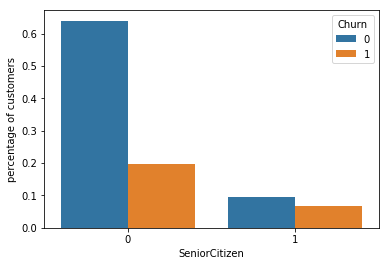

In [92]:
gp_sc = telcom.groupby('SeniorCitizen')["Churn"].value_counts()/len(telcom)
gp_sc = gp_sc.to_frame().rename({"Churn": axis_y}, axis=1).reset_index()
sns.barplot(x='SeniorCitizen', y= axis_y, hue='Churn', data=gp_sc)

-Gender is not an indicative of churn.

-SeniorCitizens are only 16% of customers, but they have a much higher churn rate: 42% against 23% for non-senior customers.

## Partner and dependents

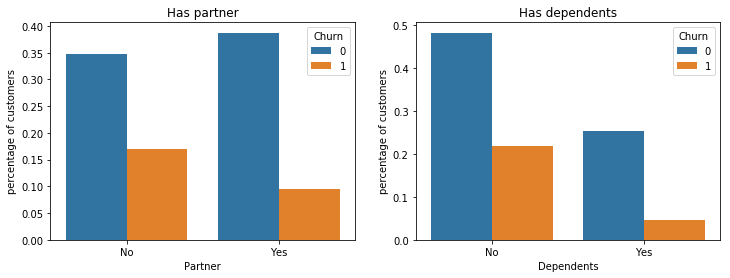

In [93]:
fig, axis = plt.subplots(1, 2, figsize=(12,4))
axis[0].set_title("Has partner")
axis[1].set_title("Has dependents")
axis_y = "percentage of customers"
# Plot Partner column
gp_partner = telcom.groupby('Partner')["Churn"].value_counts()/len(telcom)
gp_partner = gp_partner.to_frame().rename({"Churn": axis_y}, axis=1).reset_index()
ax = sns.barplot(x='Partner', y= axis_y, hue='Churn', data=gp_partner, ax=axis[0])
# Plot Dependents column
gp_dep = telcom.groupby('Dependents')["Churn"].value_counts()/len(telcom)
gp_dep = gp_dep.to_frame().rename({"Churn": axis_y}, axis=1).reset_index()
ax = sns.barplot(x='Dependents', y= axis_y, hue='Churn', data=gp_dep, ax=axis[1])

-Customers that doesn't have partners are more likely to churn

-Customers without dependents are also more likely to churn

## Phone and Internet services

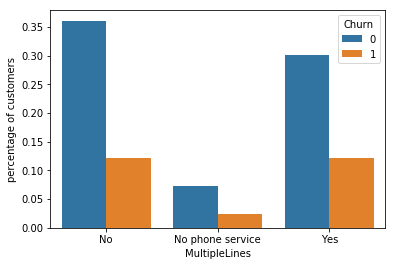

In [94]:
gp_ml = telcom.groupby('MultipleLines')["Churn"].value_counts()/len(telcom)
gp_ml = gp_ml.to_frame().rename({"Churn": axis_y}, axis=1).reset_index()
sns.barplot(x='MultipleLines', y= axis_y, hue='Churn', data=gp_ml)

/Users/Dariga/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


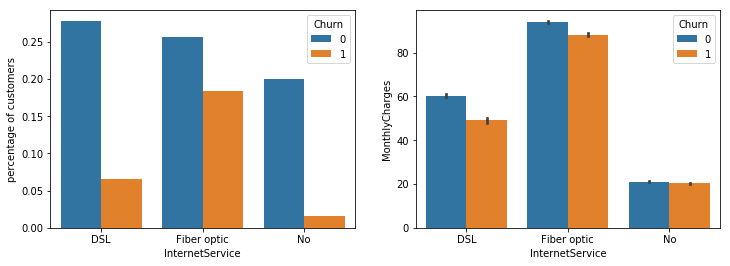

In [95]:
fig, axis = plt.subplots(1, 2, figsize=(12,4))

gp_net = telcom.groupby('InternetService')["Churn"].value_counts()/len(telcom)
gp_net= gp_net.to_frame().rename({"Churn": axis_y}, axis=1).reset_index()
ax=sns.barplot(x='InternetService', y= axis_y, hue='Churn', data=gp_net,ax=axis[0])


ax=sns.barplot(x="InternetService", y="MonthlyCharges", hue="Churn", data=telcom,ax=axis[1])

Customers with fiber are more probable to churn 

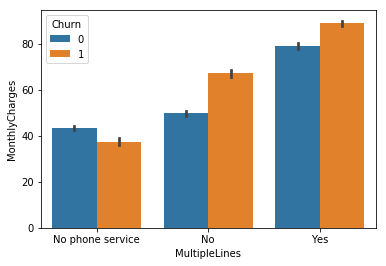

In [96]:
sns.barplot(x="MultipleLines", y="MonthlyCharges", hue="Churn", data=telcom)

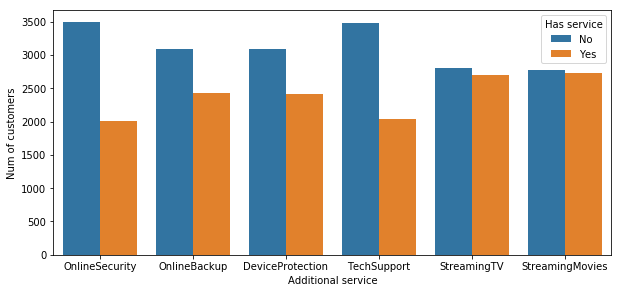

In [97]:
cols = ["OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies"]
df = pd.melt(telcom[telcom["InternetService"] != "No"][cols]).rename({'value': 'Has service'}, axis=1)
plt.figure(figsize=(10, 4.5))
ax = sns.countplot(data=df, x='variable', hue='Has service')
ax.set(xlabel='Additional service', ylabel='Num of customers')
plt.show()

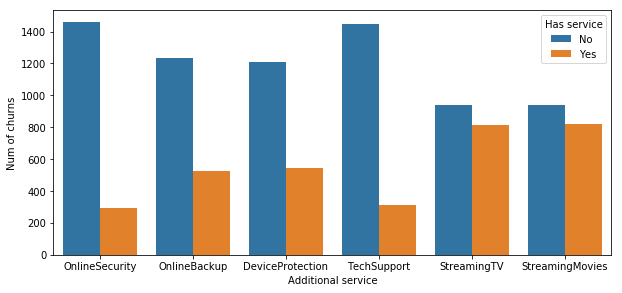

In [98]:
plt.figure(figsize=(10, 4.5))
df = telcom[(telcom.InternetService != "No") & (telcom.Churn == 1)]
df = pd.melt(df[cols]).rename({'value': 'Has service'}, axis=1)
ax = sns.countplot(data=df, x='variable', hue='Has service', hue_order=['No', 'Yes'])
ax.set(xlabel='Additional service', ylabel='Num of churns')
plt.show()

Customers with the first 4 additionals (security to tech support) are more unlikely to churn

## Contract and Payment

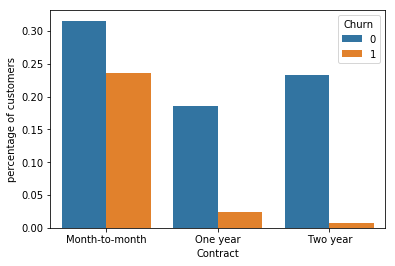

In [99]:
contr = telcom.groupby('Contract')["Churn"].value_counts()/len(telcom)
contr = contr.to_frame().rename({"Churn": axis_y}, axis=1).reset_index()
sns.barplot(x='Contract', y= axis_y, hue='Churn', data=contr)

Customers with month-to-month contract are more likely to churn. Let's see tenure then

Text(0.5, 0, 'Tenure (months)')

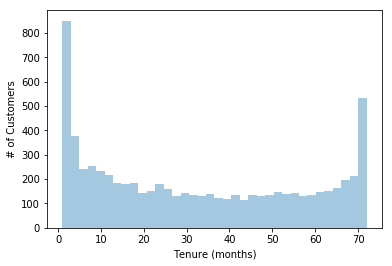

In [100]:
ax=sns.distplot(telcom['tenure'], hist=True, kde=False, 
             bins=int(180/5))
ax.set_ylabel('# of Customers')
ax.set_xlabel('Tenure (months)')

Text(0.5, 1.0, 'Two Year Contract')

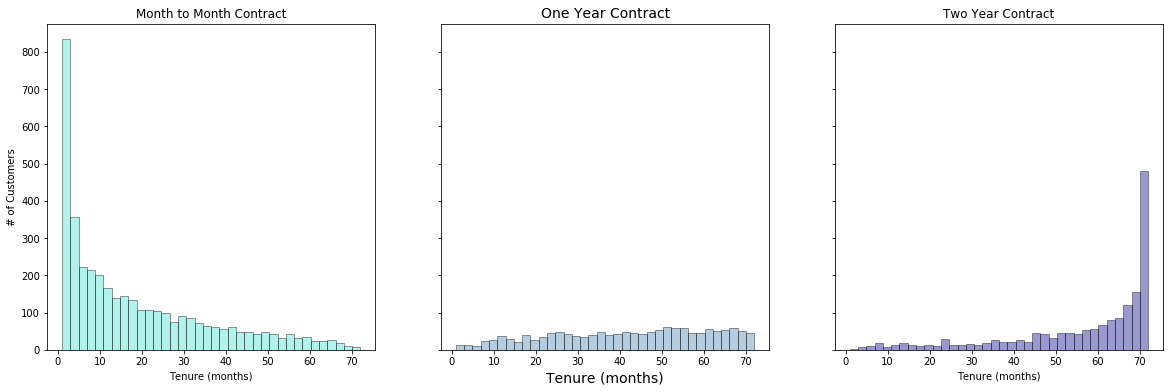

In [101]:
fig, (ax1,ax2,ax3) = plt.subplots(nrows=1, ncols=3, sharey = True, figsize = (20,6))

ax = sns.distplot(telcom[telcom['Contract']=='Month-to-month']['tenure'],
                   hist=True, kde=False,
                   bins=int(180/5), color = 'turquoise',
                   hist_kws={'edgecolor':'black'},
                   kde_kws={'linewidth': 4},
                 ax=ax1)
ax.set_ylabel('# of Customers')
ax.set_xlabel('Tenure (months)')
ax.set_title('Month to Month Contract')

ax = sns.distplot(telcom[telcom['Contract']=='One year']['tenure'],
                   hist=True, kde=False,
                   bins=int(180/5), color = 'steelblue',
                   hist_kws={'edgecolor':'black'},
                   kde_kws={'linewidth': 4},
                 ax=ax2)
ax.set_xlabel('Tenure (months)',size = 14)
ax.set_title('One Year Contract',size = 14)

ax = sns.distplot(telcom[telcom['Contract']=='Two year']['tenure'],
                   hist=True, kde=False,
                   bins=int(180/5), color = 'darkblue',
                   hist_kws={'edgecolor':'black'},
                   kde_kws={'linewidth': 4},
                 ax=ax3)

ax.set_xlabel('Tenure (months)')
ax.set_title('Two Year Contract')

Most of the monthly contracts last for 1-2 months, while the 2 year contracts tend to last for about 70 months. This shows that the customers taking a longer contract are more loyal to the company and tend to stay with it for a longer period of time.

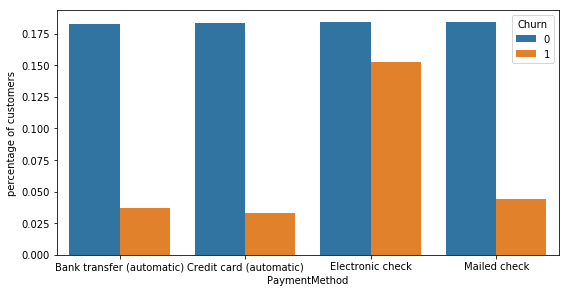

In [102]:
plt.figure(figsize=(9, 4.5))
pay = telcom.groupby('PaymentMethod')["Churn"].value_counts()/len(telcom)
pay = pay.to_frame().rename({"Churn": axis_y}, axis=1).reset_index()
sns.barplot(x='PaymentMethod', y= axis_y, hue='Churn', data=pay)

The preferred payment method is Electronic check with around 35% of customers. This method also has a very high churn rate

## Monthly and total charges

In [103]:
telcom_cust[['MonthlyCharges', 'TotalCharges']].plot.scatter(x = 'MonthlyCharges',
                                                              y='TotalCharges')

## Preprocessing

In [104]:
#replace 'No internet/phone service' to No 
for i in cols : 
    telcom[i]  = telcom[i].replace({'No internet service' : 'No'})
telcom['MultipleLines']=telcom['MultipleLines'].replace({'No phone service' : 'No'})

In [105]:
#Tenure to categorical column
def tenure_lab(telcom) :
    
    if telcom["tenure"] <= 12 :
        return "Tenure_0-12"
    elif (telcom["tenure"] > 12) & (telcom["tenure"] <= 24 ):
        return "Tenure_12-24"
    elif (telcom["tenure"] > 24) & (telcom["tenure"] <= 48) :
        return "Tenure_24-48"
    elif (telcom["tenure"] > 48) & (telcom["tenure"] <= 60) :
        return "Tenure_48-60"
    elif telcom["tenure"] > 60 :
        return "Tenure_gt_60"
telcom["tenure_group"] = telcom.apply(lambda telcom:tenure_lab(telcom),
                                      axis = 1)

In [106]:
from sklearn.preprocessing import StandardScaler
#Scaling Numerical columns
std = StandardScaler()
scaled = std.fit_transform(telcom[["MonthlyCharges", "TotalCharges"]])
scaled = pd.DataFrame(scaled,columns=["MonthlyCharges", "TotalCharges"])


In [107]:
telcom = telcom.drop(columns = ["tenure", "MonthlyCharges", "TotalCharges"],axis = 1)
telcom = telcom.merge(scaled,left_index=True,right_index=True,how = "left")

In [109]:
telcom=pd.get_dummies(telcom)

In [110]:
drop = ['Churn','gender_Female','gender_Male', 'Partner_No',
        'Dependents_No', 'PhoneService_No','PhoneService_Yes', 'PaperlessBilling_No','OnlineSecurity_No', 'OnlineBackup_No',
           'DeviceProtection_No', 'TechSupport_No',
           'StreamingTV_No', 'StreamingMovies_No']
y=telcom['Churn']
telcom=telcom.drop(drop,axis=1)
x=telcom

/Users/Dariga/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


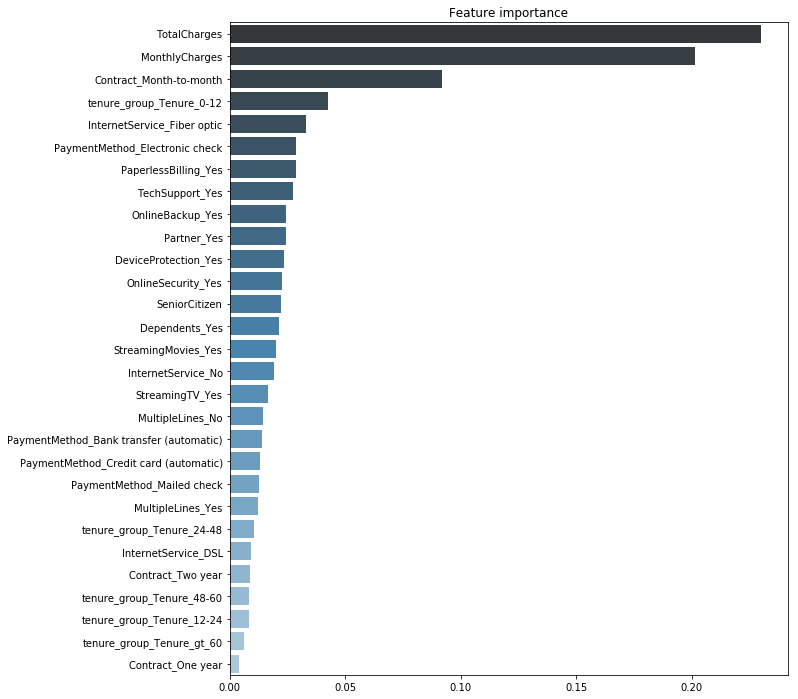

In [121]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf = clf.fit(x, y)

# Plot features importances
imp = pd.Series(data=clf.feature_importances_, index=x.columns).sort_values(ascending=False)
plt.figure(figsize=(10,12))
plt.title("Feature importance")
ax = sns.barplot(y=imp.index, x=imp.values, palette="Blues_d", orient='h')

## Model building

In [122]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.metrics import roc_auc_score,roc_curve,scorer
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score,recall_score
#splitting train and test data 
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size = .3 ,random_state = 1)

In [123]:
from sklearn.decomposition import PCA
pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [124]:
model = LogisticRegression()
model.fit(X_train,y_train)
y_pred= model.predict(X_test)
probabilities = model.predict_proba(X_test)
print ("Accuracy   Score : ",accuracy_score(y_test,y_pred))
#confusion matrix
conf_matrix = confusion_matrix(y_test,y_pred)
#roc_auc_score
model_roc_auc = roc_auc_score(y_test,y_pred) 
print ("Area under curve : ",model_roc_auc,"\n")
print(conf_matrix)
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_test, y_pred)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

Accuracy   Score :  0.8033175355450237
Area under curve :  0.713029750007242 

[[1405  150]
 [ 265  290]]
Average precision-recall score: 0.47


/Users/Dariga/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [130]:
from sklearn.svm import SVC
from sklearn import metrics

model.svm = SVC(kernel='linear') 
model.svm.fit(X_train,y_train)
preds = model.svm.predict(X_test)
print ("Accuracy   Score : ",accuracy_score(y_test,preds))
#confusion matrix
conf_matrix = confusion_matrix(y_test,preds)
#roc_auc_score
model_roc_auc = roc_auc_score(y_test,preds) 
print ("Area under curve : ",model_roc_auc,"\n")
print(conf_matrix)
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_test, preds)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

Accuracy   Score :  0.8023696682464455
Area under curve :  0.7094898757278179 

[[1408  147]
 [ 270  285]]
Average precision-recall score: 0.47


In [132]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(n_estimators=1000 , oob_score = True, n_jobs = -1,
                                  random_state =50, max_features = "auto",
                                  max_leaf_nodes = 30)
model_rf.fit(X_train, y_train)

# Make predictions
prediction_test = model_rf.predict(X_test)
print ("Accuracy   Score : ",accuracy_score(y_test,prediction_test))
#confusion matrix
conf_matrix = confusion_matrix(y_test,prediction_test)
#roc_auc_score
model_roc_auc = roc_auc_score(y_test,prediction_test) 
print ("Area under curve : ",model_roc_auc,"\n")
print(conf_matrix)
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_test, prediction_test)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

Accuracy   Score :  0.8037914691943128
Area under curve :  0.6867008487587266 

[[1452  103]
 [ 311  244]]
Average precision-recall score: 0.46


In [133]:
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X_train, y_train)
preds = model.predict(X_test)
print ("Accuracy   Score : ",accuracy_score(y_test,preds))
#confusion matrix
conf_matrix = confusion_matrix(y_test,preds)
#roc_auc_score
model_roc_auc = roc_auc_score(y_test,preds) 
print ("Area under curve : ",model_roc_auc,"\n")
print(conf_matrix)
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_test, preds)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

Accuracy   Score :  0.7829383886255924
Area under curve :  0.6795052287013702 

[[1396  159]
 [ 299  256]]
Average precision-recall score: 0.43
